<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Root Finding 01

### About this notebook

In this notebook we present some of the techniques to find the roots of a function.

---

It is often needed to find the root of a function, i.e., the values of a variable
$x$ for which $f(x) = 0$. In general, $x$ could be a scalar or a vector quantitiy and $f$ could be a single function or could represent a system of equations. It is also possible that $f$ explicitly depends on $x$ or that $f$ depends implicitly on $x$.

---
## Newton-Raphson Method

There are a variety of ways to find the roots of an equation, but the mos popular is the **Newton-Raphson** method. To describe this method, consider the expansion of a function $f(x)$ in a Taylor's series about a root $x_r$, 

\begin{equation}
f(x_r) = f(x) + (x_r - x) f'(x) +  \mathcal{O}( (x_r - x)^2) = 0 .
\end{equation}

The value $x_r$ can be seen as the value for the root at the $n$-th step of an iterative procedure. Hence, The $n+1$-th step in this iteration, up to first order, will be given by

\begin{equation}
f(x_{n+1}) = f(x_n) + \underbrace{(x_{n+1} - x_{n})}_{\delta x}
f'(x_n) \approx 0 ,
\end{equation}

from which we obtain

\begin{equation}
x_{n+1} =  x_n - \frac{f(x_n)}{f'(x_n)} .
\end{equation}

The implementation of this iterative procedure will stop when the
fractional change between iteration $n$ and $n+1$ is smaller than the floating point accuracy (machine's epsilon),

\begin{equation}
\left| \frac{[f(x_{n+1}) - f(x_{n})]}{f({x_n})} \right| < \epsilon .
\end{equation}

The convergence of the Newton-Raphson Method is second order if $f(x)$ is well
behaved and if the initial value $x_0$ is a good guess for the root. 

Important Note: This method needs to know the analytical form of the first derivative $f'(x)$. If this is not the case, we will need to evaluate the derivative numerically, which gives the so-called **secant method** which is described below.

---
### Secant Method

As stated above, the secant method is similar to the Newton-Raphson method, but the first derivative $f'(x_n)$ is evaluated numerically. Usually, it is done with a backward difference, giving  the iterative procedure

\begin{equation}
x_{n+1} = x_{n} - f(x_n)\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}\,\,.
\end{equation}

Note that this iterative procedure needs two points to start, or  to have an initial guess for the first derivative, i.e. $f'(x_0)$.  Due to the inclusion of the numerical procedure to find the first derivative, it is clear that the secant method will converge less rapidly than the Newton-Raphson method. 

#### Example. Roots of a point-sampled function using Newton-Raphson ( secant ) Method

We will read a data set from a .txt file and numerically find the root of the function using the Newton-Raphson (or secant) method. We will use a piecewise quadratic interpolation to model the function.

We load the data and, before applying  the root finding method, we note that the root can be approximately localized graphically.

In [1]:
path = ''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/CA2021/16. Root Finding/presentation/'


Mounted at /content/drive


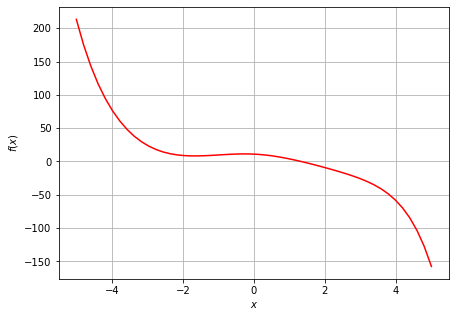

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt(path+'data_points.txt', comments='#', delimiter=',')
x_data = data[:,0]
f_data = data[:,1]

plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

 The root is somewhere between $x=0$ and $x=2$. Thus, we can restrict our attention to this interval:

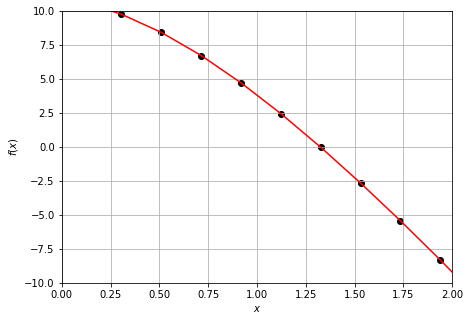

In [4]:
plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.scatter(x_data, f_data, color='black')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0,2)
plt.ylim(-10,10)
plt.grid()
plt.show()

This zoom of the plot shows that the root is inside the interval $1<x<1.75$. Therefore, we will search for three points in this interval in order to interpolate a quadratic polynomial piecewise and apply the root finding method.

In [5]:
# Find the initial and final points of the restricted interval of 
# three points to interpolate.
for i in range(len(x_data)-1):
    if x_data[i]>=1:
        a=i
        break

# The interval will include three points:
# x[a], x[a+1], x[a+2]
# Here we define the arrays that enter as arguments
# for the interpolated polynomial
x_int =[x_data[a], x_data[a+1], x_data[a+2]]
f_int =[f_data[a], f_data[a+1], f_data[a+2]]

print('a = ', a, ': x_a = ', x_data[a], ': f(x_a) = ', f_data[a])
print('a = ', 31, ': x_a = ', x_data[31], ': f(x_a) = ', f_data[31])

a =  30 : x_a =  1.12245 : f(x_a) =  2.44474
a =  31 : x_a =  1.32653 : f(x_a) =  -0.0279679


Now, we will use a quadratic polynomial interpolated piecewise in this restricted interval to find the root using the Newton-Raphson (or secant) method.

In [6]:
# 2-order Interpolated Polynomial 
def p2(x):
    pol = (((x-x_int[1])*(x-x_int[2]))/((x_int[0]-x_int[1])*(x_int[0]-x_int[2])))*f_int[0] +\
          (((x-x_int[0])*(x-x_int[2]))/((x_int[1]-x_int[0])*(x_int[1]-x_int[2])))*f_int[1] +\
          (((x-x_int[0])*(x-x_int[1]))/((x_int[2]-x_int[0])*(x_int[2]-x_int[1])))*f_int[2]
    return pol


# Newton-Raphson Method. We begin with the value at point x[a]
root0 = x_data[a]-1e-5
root = x_data[a]

while np.abs(p2(root))>1e-10:
    new_root = root - p2(root)*(root - root0)/(p2(root) - p2(root0))
    root0, root = root, new_root

print(f'The root is x_r = {root:.8f}')
print(f'for which the interpolated function gives f(x_r) =  {p2(root):.8e}')



The root is x_r = 1.32429525
for which the interpolated function gives f(x_r) =  7.09501902e-16


We can also visualise the location of the root:

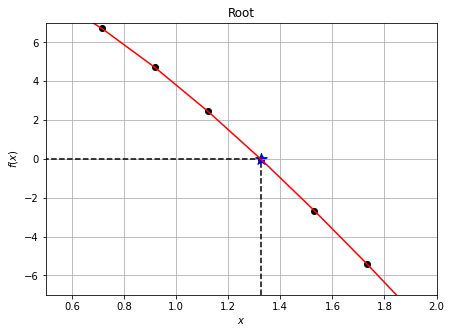

In [7]:
plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.scatter(x_data, f_data, color='black')
plt.scatter(root, p2(root), color='blue', marker='*',s=150)
plt.vlines(root, -7, p2(root), linestyle='dashed')
plt.hlines(p2(root),0, root, linestyle='dashed')
plt.title('Root')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0.5,2)
plt.ylim(-7,7)
plt.grid()
plt.show()

---
## Bisection Method

The bisection method is based on the intermediate-value theorem, which states that a continuous function $f(x)$ has at least one root in the interval $[x_a,x_b]$ if $f(x_a)$ and
$f(x_b)$ have opposite signs.

Hence, the bisection method is implemented as

1. Pick the initial values of $x_a$ and $x_b$ so that $f(x_a)$ and $f(x_b)$ have opposite signs.

2. Compute the midpoint $x_c = \frac{x_a+x_b}{2}$ and $f(x_c)$. 

3. If $f(x_c) = 0$ or
  $\left| \frac{f(x_c) - f(x_a)}{f(x_a)} \right| < \epsilon$ or $\left| \frac{f(x_c) - f(x_b)}{f(x_b)} \right| <
  \epsilon$, then he root has been found.
  
  If not:
    * If $f(x_a)$ and $f(x_c)$ have opposite signs, then they
      bracket a root. Go to (2) with $x_a=x_a$, $x_b=x_c$.
      
    * If $f(x_c)$ and $f(x_b)$ have opposite signs, then they
      bracket a root. Got to (2) with $x_a=x_c$, $x_b=x_b$.
  

Although the bisection method is very effective and robust, it is generally not as fast as Newton's Method because it requires more iterations to find the root.


#### Example. Roots of a point-sampled function using the Bisection Method

We will read a data set from a .txt file and numerically find the root of the function using the bisection method. We will use a piecewise quadratic interpolation to model the function.

We load the data and, before applying  the root finding method, we note that the root can be approximately localized graphically.

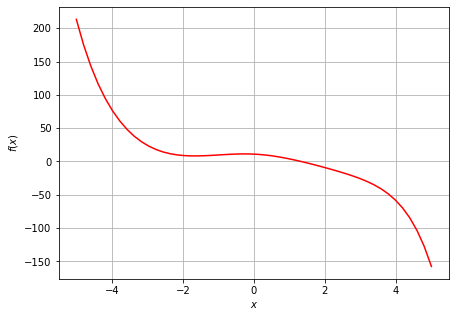

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt(path+'data_points.txt', comments='#', delimiter=',')
x_data = data[:,0]
f_data = data[:,1]

plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

 The root is somewhere between $x=0$ and $x=2$. Thus, we can restrict our attention to this interval:

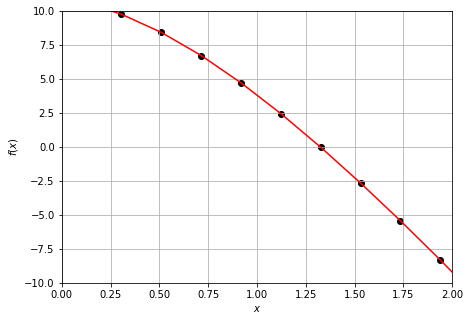

In [9]:
plt.figure(figsize=(7,5))
plt.plot(x_data, f_data, color='red')
plt.scatter(x_data, f_data, color='black')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0,2)
plt.ylim(-10,10)
plt.grid()
plt.show()

This zoom of the plot shows that the root is inside the interval $1<x<1.75$. Therefore, we will search for three points in this interval in order to interpolate a quadratic polynomial piecewise and apply the root finding method.

In [10]:
# Find the initial and final points of the restricted interval of 
# three pints to interpolate.
for i in range(len(x_data)-1):
    if x_data[i]>=1:
        a=i
        break

# The interval will include three points:
# x[a], x[a+1], x[a+2]
# Here we define the arrays that enter as arguments
# for the interpolated polynomial
x_int =[x_data[a], x_data[a+1], x_data[a+2]]
f_int =[f_data[a], f_data[a+1], f_data[a+2]]

print('a = ', a, ': x_a = ', x_data[a], ': f(x_a) = ', f_data[a])


a =  30 : x_a =  1.12245 : f(x_a) =  2.44474


Now, we will use a quadratic polynomial interpolated piecewise in this restricted interval to find the root using the Newton-Raphson (or secant) method.

In [11]:
# 2-order Interpolated Polynomial 
def p2(x):
    pol = (((x-x_int[1])*(x-x_int[2]))/((x_int[0]-x_int[1])*(x_int[0]-x_int[2])))*f_int[0] +\
          (((x-x_int[0])*(x-x_int[2]))/((x_int[1]-x_int[0])*(x_int[1]-x_int[2])))*f_int[1] +\
          (((x-x_int[0])*(x-x_int[1]))/((x_int[2]-x_int[0])*(x_int[2]-x_int[1])))*f_int[2]
    return pol


# Bisection Method. 
# We begin with the values at the points x_data[a] and x_data[a+2]
x_a = x_data[a]
x_b = x_data[a+2]
x_c = (x_a + x_b)/2.

while np.abs(p2(x_c)) > 1e-15:
    x_c = (x_a + x_b)/2.
    if p2(x_a)*p2(x_c) < 0:
        x_b = x_c
    else:
        x_a = x_c

root = x_c
    
print(f'The root is x_r = {root:.8f}')
print(f'for which the interpolated function gives f(x_r) =  {p2(root):.8e}')



The root is x_r = 1.32429525
for which the interpolated function gives f(x_r) =  7.09501902e-16
